In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import acquire

In [2]:
df = acquire.get_world_data()

In [3]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [4]:
# sns.barplot(data=df, x="GNP", y="LifeExpectancy")

<AxesSubplot:xlabel='LifeExpectancy', ylabel='GNP'>

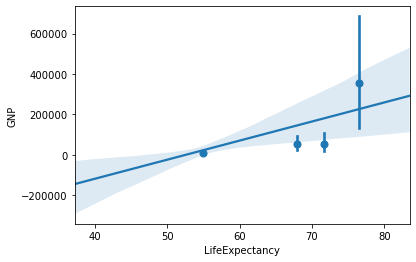

In [5]:
sns.regplot(data=df, x="LifeExpectancy", y="GNP", x_bins=4)

In [6]:
x = df.LifeExpectancy
y = df.GNP

In [7]:
# r, p = stats.pearsonr(x, y)
# print('r =', r)
# print('p =', p)

In [8]:
df.LifeExpectancy.isnull().value_counts()

False    222
True      17
Name: LifeExpectancy, dtype: int64

In [14]:
mean = df.LifeExpectancy.mean()

In [15]:
df.LifeExpectancy.mode()

0    71.4
1    73.7
2    78.8
dtype: float64

In [16]:
df.LifeExpectancy.median()

70.15

In [17]:
df.GNP.isnull().value_counts()

False    239
Name: GNP, dtype: int64

In [18]:
new_df = df.LifeExpectancy.fillna(mean)

In [19]:
df.LifeExpectancy.isnull().value_counts()

False    222
True      17
Name: LifeExpectancy, dtype: int64

In [20]:
df.LifeExpectancy.fillna(mean, inplace=True)

In [21]:
df.LifeExpectancy.isnull().value_counts()

False    239
Name: LifeExpectancy, dtype: int64

In [22]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.16385955132633062
p = 0.011177572806720678


In [23]:
##There is a significant relationship between GNP and Life Expectancy

<AxesSubplot:ylabel='Frequency'>

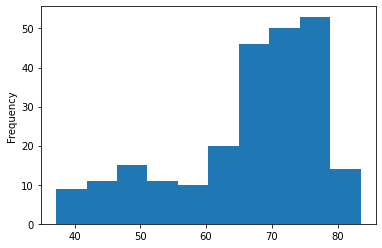

In [24]:
df['LifeExpectancy'].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

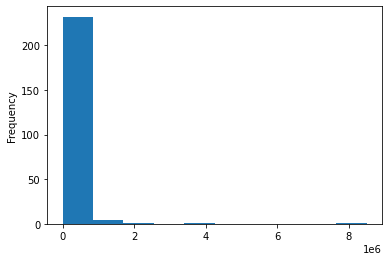

In [25]:
df['GNP'].plot(kind='hist')


In [26]:
df['LifeExpectancy'].describe()


count    239.000000
mean      66.486036
std       11.100244
min       37.200000
25%       61.650000
50%       69.200000
75%       75.150000
max       83.500000
Name: LifeExpectancy, dtype: float64

In [27]:
df['GNP'].describe()


count    2.390000e+02
mean     1.228239e+05
std      6.379976e+05
min      0.000000e+00
25%      6.400000e+02
50%      4.787000e+03
75%      2.994450e+04
max      8.510700e+06
Name: GNP, dtype: float64

In [28]:
pd.qcut(df['GNP'], q=4)

0           (640.0, 4787.0]
1         (4787.0, 29944.5]
2         (4787.0, 29944.5]
3           (-0.001, 640.0]
4           (640.0, 4787.0]
               ...         
234       (4787.0, 29944.5]
235       (4787.0, 29944.5]
236    (29944.5, 8510700.0]
237         (640.0, 4787.0]
238       (4787.0, 29944.5]
Name: GNP, Length: 239, dtype: category
Categories (4, interval[float64]): [(-0.001, 640.0] < (640.0, 4787.0] < (4787.0, 29944.5] < (29944.5, 8510700.0]]

In [29]:
df['quantile'] = pd.qcut(df['GNP'], q=4)


In [30]:
df['quantile'].value_counts()

(29944.5, 8510700.0]    60
(640.0, 4787.0]         60
(-0.001, 640.0]         60
(4787.0, 29944.5]       59
Name: quantile, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Code            239 non-null    object  
 1   Name            239 non-null    object  
 2   Continent       239 non-null    object  
 3   Region          239 non-null    object  
 4   SurfaceArea     239 non-null    float64 
 5   IndepYear       192 non-null    float64 
 6   Population      239 non-null    int64   
 7   LifeExpectancy  239 non-null    float64 
 8   GNP             239 non-null    float64 
 9   GNPOld          178 non-null    float64 
 10  LocalName       239 non-null    object  
 11  GovernmentForm  239 non-null    object  
 12  HeadOfState     236 non-null    object  
 13  Capital         232 non-null    float64 
 14  Code2           238 non-null    object  
 15  quantile        239 non-null    category
dtypes: category(1), float64(6), int64(1), object(8)
memory usage: 

In [32]:
df['quant_rank'] = np.where(df['quantile'] == '-0.001, 640.0', 1, 0)


In [33]:
df.drop(columns='quant_rank', inplace=True)

In [34]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]"
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]"
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]"
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]"
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]"


In [35]:
df['quantile'] = df['quantile'].astype('str')

In [36]:
# df['quant_rank'] = df['quant_rank'] = np.where(df['quantile']str.contains('-0.001, 640.0'))
df.loc[df['quantile'].str.contains('29944.5, 8510700.0'),'quant_rank'] = 4
df.loc[df['quantile'].str.contains('4787.0, 29944.5'),'quant_rank'] = 3
df.loc[df['quantile'].str.contains('640.0, 4787.0'),'quant_rank'] = 2
df.loc[df['quantile'].str.contains('-0.001, 640.0'),'quant_rank'] = 1

In [37]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,quant_rank
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0


In [38]:
pd.qcut(df['LifeExpectancy'], q=4)

0                    (75.15, 83.5]
1      (37.199000000000005, 61.65]
2      (37.199000000000005, 61.65]
3                    (75.15, 83.5]
4                    (69.2, 75.15]
                  ...             
234    (37.199000000000005, 61.65]
235                  (69.2, 75.15]
236    (37.199000000000005, 61.65]
237    (37.199000000000005, 61.65]
238    (37.199000000000005, 61.65]
Name: LifeExpectancy, Length: 239, dtype: category
Categories (4, interval[float64]): [(37.199000000000005, 61.65] < (61.65, 69.2] < (69.2, 75.15] < (75.15, 83.5]]

In [39]:
df['age_quanitle'] = pd.qcut(df['LifeExpectancy'], q=4)

In [40]:
df['age_quantile'] = pd.qcut(df['LifeExpectancy'], q=4)

In [41]:
df.drop(columns='age_quanitle', inplace=True)

In [42]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,quant_rank,age_quantile
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0,"(75.15, 83.5]"
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]"
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]"
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0,"(75.15, 83.5]"
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0,"(69.2, 75.15]"


In [43]:
df['age_quantile'].value_counts()

(75.15, 83.5]                  60
(61.65, 69.2]                  60
(37.199000000000005, 61.65]    60
(69.2, 75.15]                  59
Name: age_quantile, dtype: int64

In [44]:
df['age_quantile'] = df['age_quantile'].astype('str')

In [45]:
df.loc[df['age_quantile'].str.contains('75.15, 83.5'),'age_rank'] = 4
df.loc[df['age_quantile'].str.contains('69.2, 75.15'),'age_rank'] = 3
df.loc[df['age_quantile'].str.contains('61.65, 69.2'),'age_rank'] = 2
df.loc[df['age_quantile'].str.contains('37.199000000000005, 61.65'),'age_rank'] = 1

In [46]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,quant_rank,age_quantile,age_rank
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0,"(75.15, 83.5]",4.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0,"(75.15, 83.5]",4.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0,"(69.2, 75.15]",3.0


In [47]:
df.rename(columns={'quant_rank': 'gnp_rank'}, inplace=True)

In [48]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,gnp_rank,age_quantile,age_rank
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0,"(75.15, 83.5]",4.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0,"(75.15, 83.5]",4.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0,"(69.2, 75.15]",3.0


<AxesSubplot:xlabel='gnp_rank', ylabel='age_rank'>

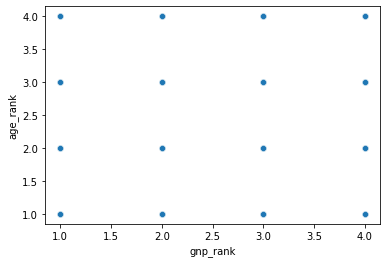

In [50]:
sns.scatterplot(data=df, x='gnp_rank', y='age_rank')

In [51]:
x = df.gnp_rank
y = df.age_rank

In [52]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.2727247347850362
p = 1.9075718614211278e-05


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LifeExpectancy', ylabel='Density'>

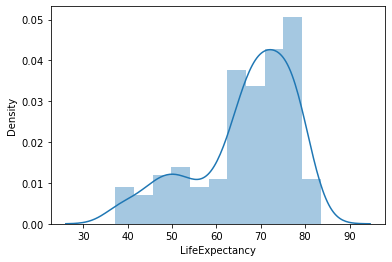

In [53]:
sns.distplot(df.LifeExpectancy)


In [54]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,gnp_rank,age_quantile,age_rank
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0,"(75.15, 83.5]",4.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0,"(75.15, 83.5]",4.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0,"(69.2, 75.15]",3.0


In [59]:
(df.groupby('Region').LifeExpectancy.mean() > 75)

Region
Antarctica                   False
Australia and New Zealand    False
Baltic Countries             False
British Islands               True
Caribbean                    False
Central Africa               False
Central America              False
Eastern Africa               False
Eastern Asia                  True
Eastern Europe               False
Melanesia                    False
Micronesia                   False
Micronesia/Caribbean         False
Middle East                  False
Nordic Countries              True
North America                 True
Northern Africa              False
Polynesia                    False
South America                False
Southeast Asia               False
Southern Africa              False
Southern Europe               True
Southern and Central Asia    False
Western Africa               False
Western Europe                True
Name: LifeExpectancy, dtype: bool

In [62]:
df[df.Name == 'United States']

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,gnp_rank,age_quantile,age_rank
223,USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US,"(29944.5, 8510700.0]",4.0,"(75.15, 83.5]",4.0


In [66]:
8510700 * 1000000  8510700000000

8510700000000

In [67]:
8510700000000 / 278357000

30574.765498981524

In [68]:
df['real_gnp'] = df.GNP * 1000000

In [69]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,gnp_rank,age_quantile,age_rank,real_gnp
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0,"(75.15, 83.5]",4.0,8.280000e+08
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0,5.976000e+09
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0,6.648000e+09
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0,"(75.15, 83.5]",4.0,6.320000e+07
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0,"(69.2, 75.15]",3.0,3.205000e+09


In [72]:
df['gnp_per_capita'] = round(df.real_gnp / df.Population, 2)

In [73]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,...,GovernmentForm,HeadOfState,Capital,Code2,quantile,gnp_rank,age_quantile,age_rank,real_gnp,gnp_per_capita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,...,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0,"(75.15, 83.5]",4.0,8.280000e+08,8038.83
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,...,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0,5.976000e+09,263.03
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,...,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0,6.648000e+09,516.23
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,...,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0,"(75.15, 83.5]",4.0,6.320000e+07,7900.00
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,...,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0,"(69.2, 75.15]",3.0,3.205000e+09,942.31


In [75]:
df[df.Name == 'United States']

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,...,GovernmentForm,HeadOfState,Capital,Code2,quantile,gnp_rank,age_quantile,age_rank,real_gnp,gnp_per_capita
223,USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,...,Federal Republic,George W. Bush,3813.0,US,"(29944.5, 8510700.0]",4.0,"(75.15, 83.5]",4.0,8.510700e+12,30574.77


In [77]:
## GWB was President, so this was almost 2 decades ago. Also shows our population at 278mil.

<AxesSubplot:xlabel='gnp_per_capita', ylabel='LifeExpectancy'>

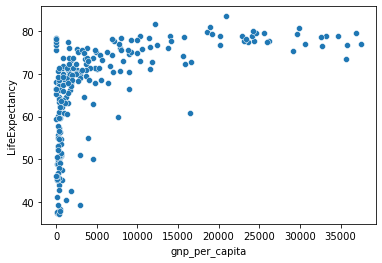

In [78]:
sns.scatterplot(data=df, x='gnp_per_capita', y='LifeExpectancy')

In [82]:
df[df.gnp_per_capita.isnull()]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,...,GovernmentForm,HeadOfState,Capital,Code2,quantile,gnp_rank,age_quantile,age_rank,real_gnp,gnp_per_capita
11,ATA,Antarctica,Antarctica,Antarctica,13120000.0,NaN,0,66.486036,0.0,NaN,...,Co-administrated,NaN,NaN,AQ,"(-0.001, 640.0]",1.0,"(61.65, 69.2]",2.0,0.0,NaN
12,ATF,French Southern territories,Antarctica,Antarctica,7780.0,NaN,0,66.486036,0.0,NaN,...,Nonmetropolitan Territory of France,Jacques Chirac,NaN,TF,"(-0.001, 640.0]",1.0,"(61.65, 69.2]",2.0,0.0,NaN
34,BVT,Bouvet Island,Antarctica,Antarctica,59.0,NaN,0,66.486036,0.0,NaN,...,Dependent Territory of Norway,Harald V,NaN,BV,"(-0.001, 640.0]",1.0,"(61.65, 69.2]",2.0,0.0,NaN
93,HMD,Heard Island and McDonald Islands,Antarctica,Antarctica,359.0,NaN,0,66.486036,0.0,NaN,...,Territory of Australia,Elisabeth II,NaN,HM,"(-0.001, 640.0]",1.0,"(61.65, 69.2]",2.0,0.0,NaN
100,IOT,British Indian Ocean Territory,Africa,Eastern Africa,78.0,NaN,0,66.486036,0.0,NaN,...,Dependent Territory of the UK,Elisabeth II,NaN,IO,"(-0.001, 640.0]",1.0,"(61.65, 69.2]",2.0,0.0,NaN
187,SGS,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,3903.0,NaN,0,66.486036,0.0,NaN,...,Dependent Territory of the UK,Elisabeth II,NaN,GS,"(-0.001, 640.0]",1.0,"(61.65, 69.2]",2.0,0.0,NaN
221,UMI,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,16.0,NaN,0,66.486036,0.0,NaN,...,Dependent Territory of the US,George W. Bush,NaN,UM,"(-0.001, 640.0]",1.0,"(61.65, 69.2]",2.0,0.0,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 238
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    float64
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  239 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    float64
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     236 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           238 non-null    object 
 15  quantile        239 non-null    object 
 16  gnp_rank        239 non-null    float64
 17  age_quantile    239 non-null    obj

In [85]:
df.drop(columns=['IndepYear', 'GNPOld', 'HeadOfState'], inplace=True)

In [86]:
mean = df.gnp_per_capita.mean()

In [88]:
df['gnp_per_capita'].fillna(mean, inplace=True)

In [89]:
x = df.LifeExpectancy
y = df.gnp_per_capita

In [90]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.5390755202127425
p = 2.0349759500779592e-19


In [91]:
df.gnp_per_capita.value_counts()

0.000000        17
6089.685431      7
9000.000000      2
24048.430000     1
391.800000       1
                ..
9909.090000      1
509.980000       1
16416.670000     1
4795.810000      1
7900.000000      1
Name: gnp_per_capita, Length: 216, dtype: int64

In [92]:
df.head(20)

,Code,Name,Continent,Region,SurfaceArea,Population,LifeExpectancy,GNP,LocalName,GovernmentForm,Capital,Code2,quantile,gnp_rank,age_quantile,age_rank,real_gnp,gnp_per_capita
0,ABW,Aruba,North America,Caribbean,193.0,103000,78.400000,828.0,Aruba,Nonmetropolitan Territory of The Netherlands,129.0,AW,"(640.0, 4787.0]",2.0,"(75.15, 83.5]",4.0,8.280000e+08,8038.830000
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,22720000,45.900000,5976.0,Afganistan/Afqanestan,Islamic Emirate,1.0,AF,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0,5.976000e+09,263.030000
2,AGO,Angola,Africa,Central Africa,1246700.0,12878000,38.300000,6648.0,Angola,Republic,56.0,AO,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]",1.0,6.648000e+09,516.230000
3,AIA,Anguilla,North America,Caribbean,96.0,8000,76.100000,63.2,Anguilla,Dependent Territory of the UK,62.0,AI,"(-0.001, 640.0]",1.0,"(75.15, 83.5]",4.0,6.320000e+07,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,3401200,71.600000,3205.0,Shqipëria,Republic,34.0,AL,"(640.0, 4787.0]",2.0,"(69.2, 75.15]",3.0,3.205000e+09,942.310000
5,AND,Andorra,Europe,Southern Europe,468.0,78000,83.500000,1630.0,Andorra,Parliamentary Coprincipality,55.0,AD,"(640.0, 4787.0]",2.0,"(75.15, 83.5]",4.0,1.630000e+09,20897.440000
6,ANT,Netherlands Antilles,North America,Caribbean,800.0,217000,74.700000,1941.0,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,33.0,AN,"(640.0, 4787.0]",2.0,"(69.2, 75.15]",3.0,1.941000e+09,8944.700000
7,ARE,United Arab Emirates,Asia,Middle East,83600.0,2441000,74.100000,37966.0,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,65.0,AE,"(29944.5, 8510700.0]",4.0,"(69.2, 75.15]",3.0,3.796600e+10,15553.460000
8,ARG,Argentina,South America,South America,2780400.0,37032000,75.100000,340238.0,Argentina,Federal Republic,69.0,AR,"(29944.5, 8510700.0]",4.0,"(69.2, 75.15]",3.0,3.402380e+11,9187.680000
9,ARM,Armenia,Asia,Middle East,29800.0,3520000,66.400000,1813.0,Hajastan,Republic,126.0,AM,"(640.0, 4787.0]",2.0,"(61.65, 69.2]",2.0,1.813000e+09,515.060000


In [93]:
df.gnp_per_capita.sort_values(ascending=False)

127    37459.26
39     36936.20
28     35815.38
32     35685.98
123    34643.96
         ...   
142        0.00
209        0.00
87         0.00
52         0.00
71         0.00
Name: gnp_per_capita, Length: 239, dtype: float64

(array([145.,  33.,  18.,   9.,   6.,   5.,  11.,   3.,   4.,   5.]),
 array([    0.   ,  3745.926,  7491.852, 11237.778, 14983.704, 18729.63 ,
        22475.556, 26221.482, 29967.408, 33713.334, 37459.26 ]),
 <BarContainer object of 10 artists>)

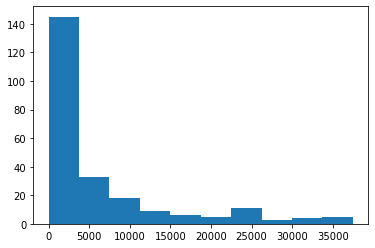

In [94]:
plt.hist(df.gnp_per_capita)